# Slim Chickens End of Year Analytics

In [1]:
import sys
sys.path.append('../../')
from env import conn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cs = conn.cursor()

In [3]:
def execute_query(query):
    try:
        cur = conn.cursor()
        cur.execute(query)

        df = pd.DataFrame(cur.fetchall(), columns=[col[0] for col in cur.description])
        return df
    finally:
        cur.close()

In [4]:
query = """select * from PROD.BINK_SECURE.FACT_TRANSACTION
        where loyalty_plan_company = 'The Works'
         order by event_date_time;"""

df = execute_query(query)

In [5]:
df.head()

,EVENT_ID,EVENT_DATE_TIME,USER_ID,EXTERNAL_USER_REF,CHANNEL,BRAND,TRANSACTION_ID,PROVIDER_SLUG,FEED_TYPE,DUPLICATE_TRANSACTION,...,SPEND_CURRENCY,LOYALTY_ID,LOYALTY_CARD_ID,MERCHANT_ID,PAYMENT_ACCOUNT_ID,SETTLEMENT_KEY,AUTH_CODE,APPROVAL_CODE,INSERTED_DATE_TIME,UPDATED_DATE_TIME
0,8066591,2023-06-22 17:01:10.506868,527465,,BINK,BINK,MDHS9JEEV_20230620,the-works,None,False,...,GBP,6338849477110114900133,520146,2216720,1413414,bfda28f37d4f63781a49e1385c3a090956d54d5b564841...,655256,,2023-11-27 11:44:28.631,2023-11-27 11:44:28.631
1,8066593,2023-06-22 17:01:10.983876,527465,,BINK,BINK,MDHGYRHEU_20230620,the-works,None,False,...,GBP,6338849477110114900133,520146,3012581,1413414,89d60a8e3ea37c7a8447bc35585763f302417a85c8a6c6...,625502,,2023-11-27 11:44:28.631,2023-11-27 11:44:28.631
2,10197839,2023-08-10 12:59:05.660148,527465,,BINK,BINK,483222467433345,the-works,None,False,...,GBP,6338847686410120150256,538198,3012581,262724,1a4ee5a4868c0936863b435fefb9e0eadb10020121dc8c...,294336,,2023-11-27 11:44:28.631,2023-11-27 11:44:28.631
3,10359056,2023-08-14 13:15:32.999296,527465,,BINK,BINK,483226477302542,the-works,None,False,...,GBP,6338847686410120150256,538198,3012581,262724,1791941a33de81c2ac1f06126044ff2fac7447d026ac4b...,959005,,2023-11-27 11:44:28.631,2023-11-27 11:44:28.631
4,10477422,2023-08-17 09:47:16.072021,527465,,BINK,BINK,483229352337205,the-works,None,True,...,GBP,6338847686410120150256,538939,3012581,262724,7f5430e857da9cf009cc66c268e5c1a5c9ad1d24a06cd5...,,,2023-11-27 11:44:28.631,2023-11-27 11:44:28.631


In [6]:
df.describe()

,EVENT_ID,EVENT_DATE_TIME,TRANSACTION_DATE,SPEND_AMOUNT,INSERTED_DATE_TIME,UPDATED_DATE_TIME
count,1.509000e+03,1509,1509,1509.000000,1509,1509
mean,1.406438e+07,2023-10-28 10:41:52.834374400,2023-10-28 01:37:16.181576960,11.640915,2023-11-28 06:03:45.594185984,2023-11-28 06:03:45.594185984
min,8.066591e+06,2023-06-22 17:01:10.506868,2023-06-20 15:32:00,-52.500000,2023-11-27 11:44:28.631000,2023-11-27 11:44:28.631000
25%,1.310219e+07,2023-10-09 10:55:03.637597952,2023-10-09 11:55:01,4.000000,2023-11-27 11:44:28.631000064,2023-11-27 11:44:28.631000064
50%,1.408633e+07,2023-11-02 06:33:46.423887872,2023-11-01 20:12:37,8.000000,2023-11-27 11:44:28.631000064,2023-11-27 11:44:28.631000064
75%,1.524218e+07,2023-11-21 09:25:49.768616960,2023-11-19 16:49:18,15.000000,2023-11-27 11:44:28.631000064,2023-11-27 11:44:28.631000064
max,1.635541e+07,2023-12-06 01:20:23.531347,2023-12-05 18:30:43,101.020000,2023-12-06 02:15:20.701000,2023-12-06 02:15:20.701000
std,1.390793e+06,NaN,NaN,12.383281,NaN,NaN


In [7]:
df.columns

Index(['EVENT_ID', 'EVENT_DATE_TIME', 'USER_ID', 'EXTERNAL_USER_REF',
       'CHANNEL', 'BRAND', 'TRANSACTION_ID', 'PROVIDER_SLUG', 'FEED_TYPE',
       'DUPLICATE_TRANSACTION', 'LOYALTY_PLAN_NAME', 'LOYALTY_PLAN_COMPANY',
       'TRANSACTION_DATE', 'SPEND_AMOUNT', 'SPEND_CURRENCY', 'LOYALTY_ID',
       'LOYALTY_CARD_ID', 'MERCHANT_ID', 'PAYMENT_ACCOUNT_ID',
       'SETTLEMENT_KEY', 'AUTH_CODE', 'APPROVAL_CODE', 'INSERTED_DATE_TIME',
       'UPDATED_DATE_TIME'],
      dtype='object')

In [8]:
df["EXTERNAL_USER_REF"] = df["EXTERNAL_USER_REF"].apply(hash)

df_agg = df.groupby(by="EXTERNAL_USER_REF", ).agg(
    TRANSACTION_ID_count=('TRANSACTION_ID', 'count'),
    SPEND_AMOUNT_sum = ('SPEND_AMOUNT','sum'),
    SPEND_AMOUNT_mean = ('SPEND_AMOUNT','mean'),
    SPEND_AMOUNT_min = ('SPEND_AMOUNT','min', ),
    SPEND_AMOUNT_max = ('SPEND_AMOUNT','max', ),
    SPEND_AMOUNT_range = ('SPEND_AMOUNT',lambda x: x.max() - x.min()),
    EVENT_DATE_TIME_range = ('EVENT_DATE_TIME', lambda x: (x.max() - x.min()).days),
    EVENT_DATE_TIME_max = ('EVENT_DATE_TIME', 'min'),
    EVENT_DATE_TIME_min = ('EVENT_DATE_TIME', 'max'),
)

df_agg.describe()

,TRANSACTION_ID_count,SPEND_AMOUNT_sum,SPEND_AMOUNT_mean,SPEND_AMOUNT_min,SPEND_AMOUNT_max,SPEND_AMOUNT_range,EVENT_DATE_TIME_range,EVENT_DATE_TIME_max,EVENT_DATE_TIME_min
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691,691
mean,2.183792,25.421331,12.357939,9.729479,15.948625,6.219146,13.428365,2023-10-25 13:23:15.247007488,2023-11-08 03:48:29.480203776
min,1.000000,-12.000000,-12.000000,-52.500000,-12.000000,0.000000,0.000000,2023-06-22 17:01:10.506868,2023-08-23 14:59:02.299243
25%,1.000000,7.000000,5.500000,3.075000,6.000000,0.000000,0.000000,2023-10-04 11:35:34.487588608,2023-10-26 10:57:50.048834304
50%,1.000000,14.000000,9.650000,7.000000,12.000000,0.000000,0.000000,2023-10-31 09:21:17.852165120,2023-11-14 20:52:30.753842944
75%,2.000000,29.500000,15.900000,12.500000,20.310000,7.250000,15.500000,2023-11-19 16:05:40.123925504,2023-11-27 06:22:46.595844608
max,34.000000,456.220000,101.020000,101.020000,101.020000,105.000000,151.000000,2023-12-05 21:30:49.500315,2023-12-06 01:20:23.531347
std,3.030679,37.534184,10.797826,11.102632,14.577905,13.115423,24.649520,NaN,NaN


In [9]:
df_agg.columns

Index(['TRANSACTION_ID_count', 'SPEND_AMOUNT_sum', 'SPEND_AMOUNT_mean',
       'SPEND_AMOUNT_min', 'SPEND_AMOUNT_max', 'SPEND_AMOUNT_range',
       'EVENT_DATE_TIME_range', 'EVENT_DATE_TIME_max', 'EVENT_DATE_TIME_min'],
      dtype='object')

In [10]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691 entries, -9171300319711091006 to 9203967589084124975
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   TRANSACTION_ID_count   691 non-null    int64         
 1   SPEND_AMOUNT_sum       691 non-null    float64       
 2   SPEND_AMOUNT_mean      691 non-null    float64       
 3   SPEND_AMOUNT_min       691 non-null    float64       
 4   SPEND_AMOUNT_max       691 non-null    float64       
 5   SPEND_AMOUNT_range     691 non-null    float64       
 6   EVENT_DATE_TIME_range  691 non-null    int64         
 7   EVENT_DATE_TIME_max    691 non-null    datetime64[ns]
 8   EVENT_DATE_TIME_min    691 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(5), int64(2)
memory usage: 54.0 KB


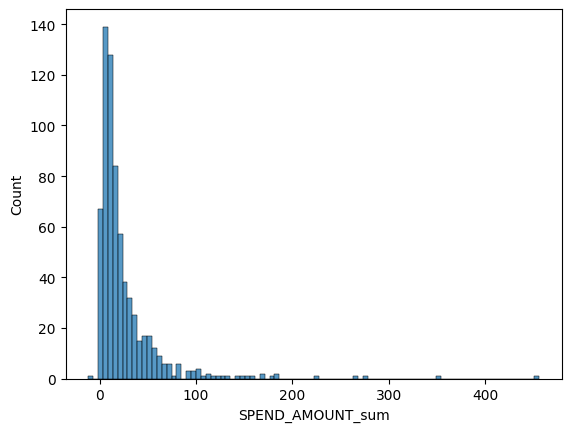

In [11]:
plot = sns.histplot(data=df_agg, x=df_agg['SPEND_AMOUNT_sum'])

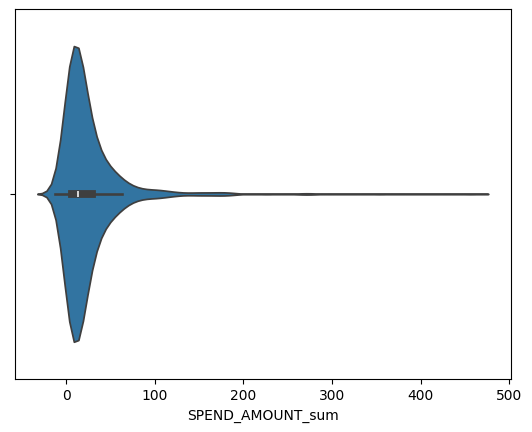

In [12]:
plot = sns.violinplot(data=df_agg, x=df_agg['SPEND_AMOUNT_sum'])

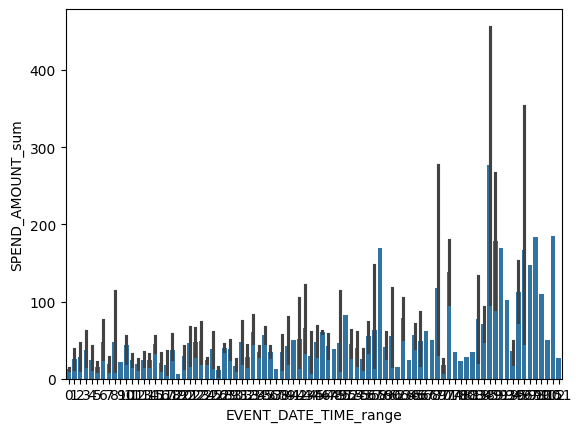

In [13]:
plot = sns.barplot(data=df_agg, x=df_agg['EVENT_DATE_TIME_range'], y=df_agg['SPEND_AMOUNT_sum'])

<Axes: >

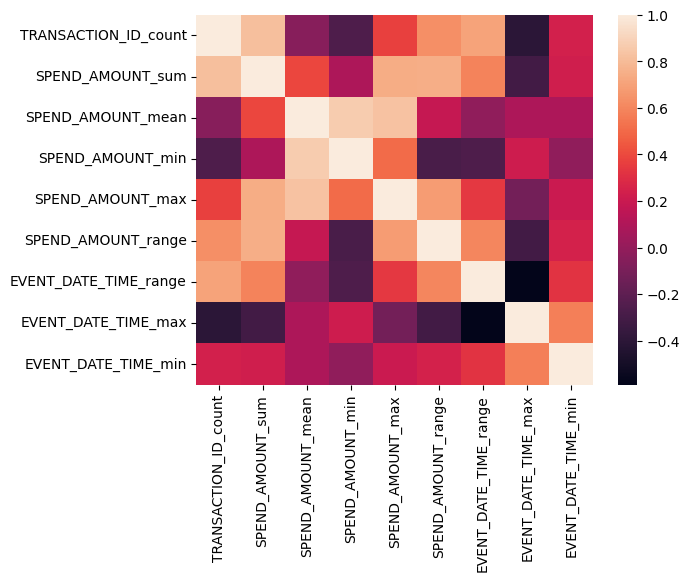

In [14]:
corr = df_agg.corr()
sns.heatmap(corr)